In [549]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [550]:
#gamma_10 -> L=10mH, C=47nF, R=47R
#gamma_44 -> L=44mH, C=47nF, R=47R
#gamma_44_nucleo -> L=44mH, C=47nF, R=47R + Núcleo
#gamma_44_nucleo_66f -> L=44mH, C=6.6uF, R=47R

R = 100
L = 10.7*1e-3
C = 47.1*1e-9

omega_0 = 1/np.sqrt(L*C)
gamma = R/L

omega = np.sqrt(omega_0**2 - gamma**2/4)
gamma

9345.794392523365

In [551]:
df = pd.read_csv('gamma_10mh_1_1.csv', sep='\t')

x_data = df['second'].values
y_data = df['Volt'].values
x_data_err = df['unc_seconds'].values
y_data_err = df['unc_Volt'].values


In [552]:
def func(x_data, A, gamma, omega, phi):
    return A*np.exp(-gamma/2 *x_data) *np.sin(omega*x_data - phi)                                                                             

popt, pcov = curve_fit(func, x_data, y_data, p0 = [1, gamma, omega, 0])
A, gamma, omega, phi = popt 
A_err, gamma_err, omega_err, phi_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))

x_data_t = np.linspace(min(x_data), max(x_data), 2000)

print(f"gamma = {gamma} +- {gamma_err}")

gamma = 10972.112178597543 +- 51.57190880018939


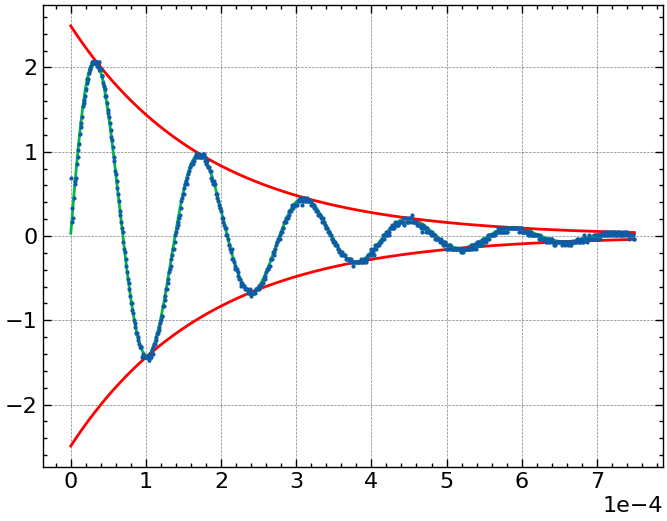

In [553]:
plt.errorbar(x_data, y_data, xerr=x_data_err, yerr= y_data_err, marker = 'o',ms = 2, ls = '', label = 'Pontos Expimentais')
plt.plot(x_data_t, func(x_data_t,*popt),  label = 'Ajuste Experimental') 
plt.plot(x_data, np.abs(A)*np.exp(-gamma/2 *x_data), color = 'red')
plt.plot(x_data, -np.abs(A)*np.exp(-gamma/2 *x_data), color = 'red')


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))